In [ ]:
# by Sarah Liau

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [2]:
df = pd.read_csv('Human Development Index and Components.csv')

In [3]:
df

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13,"64,660",6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5
...,...,...,...,...,...,...,...,...,...,...
190,191,South Sudan,LOW,0.385,55.0,5.5,5.7,768,-1,191
191,192,Korea (Democratic People's Rep. of),OTHER,..,73.3,10.8,..,..,..,..
192,193,Monaco,OTHER,..,85.9,..,..,..,..,..
193,194,Nauru,OTHER,..,63.6,11.7,..,"17,730",..,..


## Clean Data

In [4]:
# Drop last 2 unnamed/empty columns
df.drop(df.columns[10:], axis = 1, inplace = True)

In [5]:
# Drop all rows with NA values
for x in df:
    df.drop(df[df[x] == '..'].index, inplace = True)

In [6]:
# Drop the extra HDI rank column
df.drop(df.columns[9], axis = 1, inplace = True)

In [7]:
# Change objects to floats
df['Human Development Index (HDI) '] = pd.to_numeric(df['Human Development Index (HDI) '])
df['Expected years of schooling'] = pd.to_numeric(df['Expected years of schooling'])
df['Mean years of schooling'] = pd.to_numeric(df['Mean years of schooling'])
df['Gross national income (GNI) per capita'] = df['Gross national income (GNI) per capita'].str.replace(',', '').astype(float)
df['GNI per capita rank minus HDI rank'] = pd.to_numeric(df['GNI per capita rank minus HDI rank'])

df.dtypes

HDI rank                                    int64
Country                                    object
HUMAN DEVELOPMENT                          object
Human Development Index (HDI)             float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
GNI per capita rank minus HDI rank          int64
dtype: object

In [8]:
# Final cleaned dataset
df

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66933.0,5
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64660.0,6
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55782.0,11
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62607.0,6
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49238.0,18
...,...,...,...,...,...,...,...,...,...
186,187,Burundi,LOW,0.426,61.7,10.7,3.1,732.0,4
187,188,Central African Republic,LOW,0.404,53.9,8.0,4.3,966.0,1
188,189,Niger,LOW,0.400,61.6,7.0,2.1,1240.0,-3
189,190,Chad,LOW,0.394,52.5,8.0,2.6,1364.0,-7


## Selecting Features for Multiple Linear Regression to Predict Human Development Index (HDI)

In [9]:
df.corr(numeric_only = True)

,HDI rank,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
HDI rank,1.000000,-0.992091,-0.899671,-0.890303,-0.896909,-0.816697,-0.128976
Human Development Index (HDI),-0.992091,1.000000,0.905833,0.895548,0.909068,0.788034,0.130059
Life expectancy at birth,-0.899671,0.905833,1.000000,0.779929,0.734046,0.735556,0.228825
Expected years of schooling,-0.890303,0.895548,0.779929,1.000000,0.778115,0.639140,0.294560
Mean years of schooling,-0.896909,0.909068,0.734046,0.778115,1.000000,0.650694,0.260892
Gross national income (GNI) per capita,-0.816697,0.788034,0.735556,0.639140,0.650694,1.000000,-0.158049
GNI per capita rank minus HDI rank,-0.128976,0.130059,0.228825,0.294560,0.260892,-0.158049,1.000000


We will use a multiple linear regression in order to create a model, from our data, to predict human development index. Looking at the correlation matrix, the column that is most correlated to human development index is mean years of schooling, with a coefficient of 0.909. Thus, mean years of schooling will be the first feature in our model. The column with the second highest correltation to human development index is life expectancy at birth, with a coefficient of 0.906. The correlation between mean years of schooling and life expectancy at birth is 0.734 which is less than 0.8, we can add both of these features to our model.

## Building the Multiple Linear Regression Model

In [10]:
mean_school = df['Mean years of schooling']
life_expec = df['Life expectancy at birth']

X = np.vstack((mean_school, life_expec)).T
Y = df['Human Development Index (HDI) ']

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9497822843669754

In [11]:
print(reg.coef_)
print(reg.intercept_)

[0.02513534 0.01019108]
-0.23200748365003654


The r-squared value of our multiple linear regression model 0.950. This means that approximately 95% of the variation in the ouput can be explained by the variation in the input, for our model. The multiple linear regression equation predicting human development index using mean years of schooling and life expectancy at birth is: *human development index* = (0.025 $\times$ *mean years of schooling*) + (0.010 $\times$ *life expectancy at birth*) - 0.232. 

## Checking the Linear Regression Model Assumptions

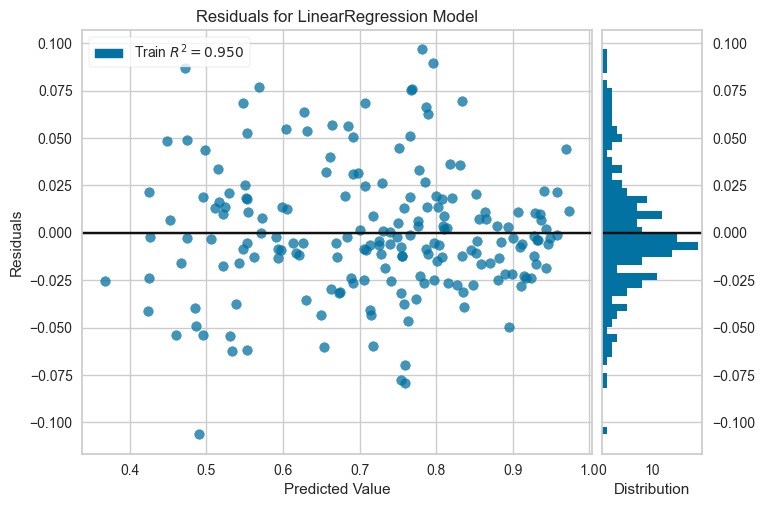

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
# Linearity
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, Y)
visualizer.show()

1. Linearity: In the residual plot for our linear regression model there is no clear trend or pattern, thus the linearity assumption is passed.
2. Independence: The dataframe that we are given includes observations from 195 different countries, with one observation per country. Thus, we can assume that the observations in the dataframe are independent of each other and the independence assumption is passed.
3. Constant Variance: In the residual plot for our linear regression model the scatter is evenly distributed across the regression line, thus this assumption is passed.
4. Normally Distributed Residuals: The histogram of the residulas looks to be roughly normally distributed, thus this assumption is passed.

## Correlation Heatmap

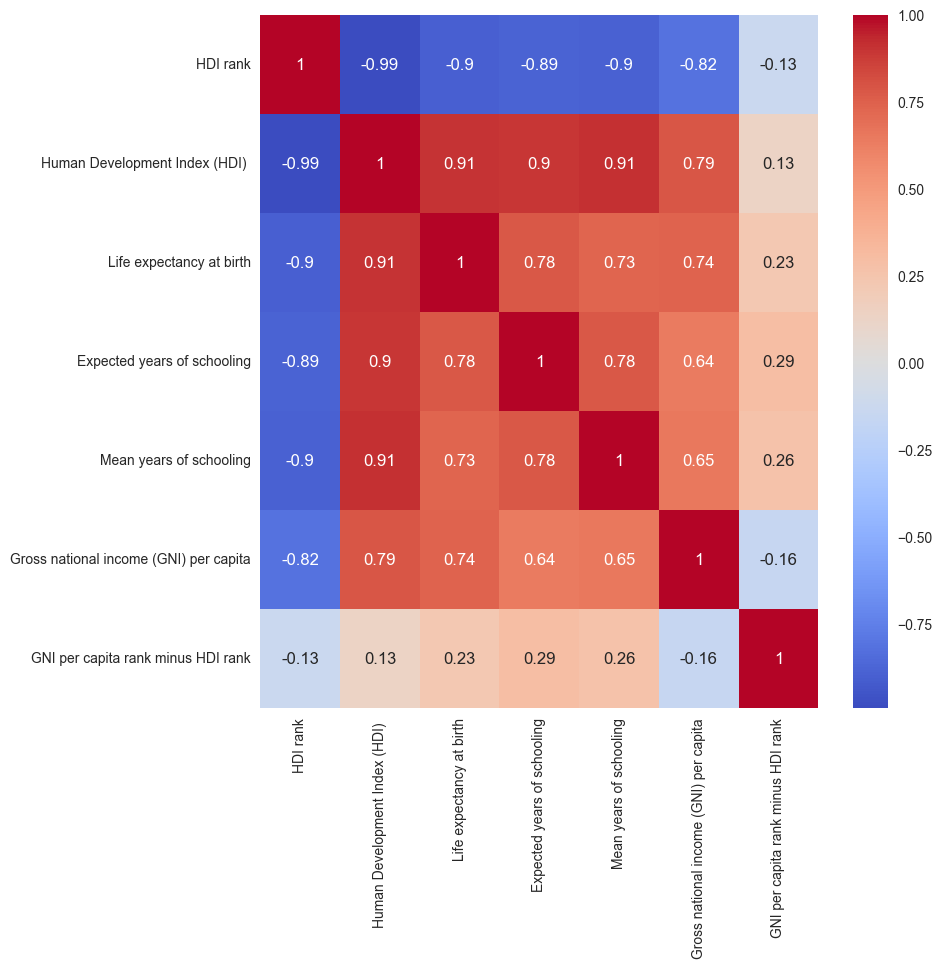

In [13]:
from seaborn import heatmap

corr = df.corr(numeric_only = True)

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

## Application of PCA to Generate New Correlation Heatmap

In [14]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.decomposition import PCA

In [15]:
# Generate train and test sets
y = df["Human Development Index (HDI) "]
X = df.drop(["Human Development Index (HDI) ", "Country", "HUMAN DEVELOPMENT"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [16]:
# fit PCA
pca = PCA(n_components = 5)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

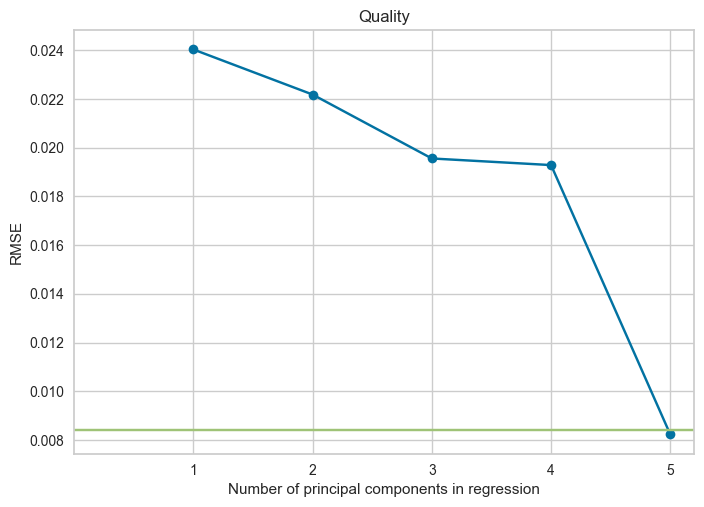

In [18]:
# Generate all the principal components
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_train_pc = pca.fit_transform(X_train_scaled)

# Define cross-validation folds
cv = KFold(n_splits = 10, shuffle=True, random_state=42)

# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()

# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [19]:
sum(pca.explained_variance_ratio_)

0.9975606285666742

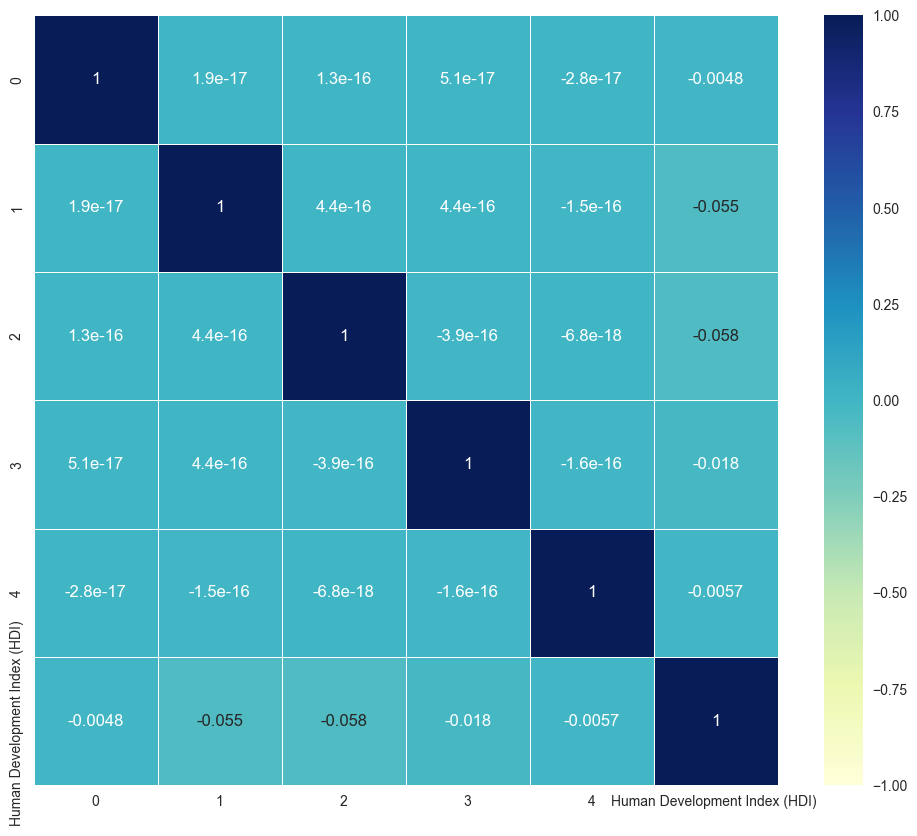

In [20]:
# Generate heatmap of PCA correlations
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["Human Development Index (HDI) "] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.show()